In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import classification_report
# for balance labels
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import cv2
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from skimage import color

%matplotlib inline

In [2]:
mypath = '/Users/yinzi/Downloads/UTKFace'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')

# put the age in different interval
df['age']=np.where(((df.age>=1) & (df.age<=2)), 0, df.age)
df['age']=np.where(((df.age>=3) & (df.age<6)), 1, df.age)
df['age']=np.where(((df.age>=6) & (df.age<9)), 2, df.age)
df['age']=np.where(((df.age>=9) & (df.age<12)), 3, df.age)
df['age']=np.where(((df.age>=12) & (df.age<21)), 4, df.age)
df['age']=np.where(((df.age>=21) & (df.age<36)), 5, df.age)
df['age']=np.where(((df.age>=36) & (df.age<51)), 6, df.age)
df['age']=np.where(((df.age>=51) & (df.age<80)), 7, df.age)
df['age']=np.where((df.age>=80), 8, df.age)

In [3]:
df.head()

,age,gender,race,file
0,3,1,2,/Users/yinzi/Downloads/UTKFace/9_1_2_201612192...
1,6,0,1,/Users/yinzi/Downloads/UTKFace/36_0_1_20170117...
2,8,1,0,/Users/yinzi/Downloads/UTKFace/86_1_0_20170120...
3,5,1,0,/Users/yinzi/Downloads/UTKFace/26_1_0_20170116...
4,0,1,2,/Users/yinzi/Downloads/UTKFace/1_1_2_201612191...


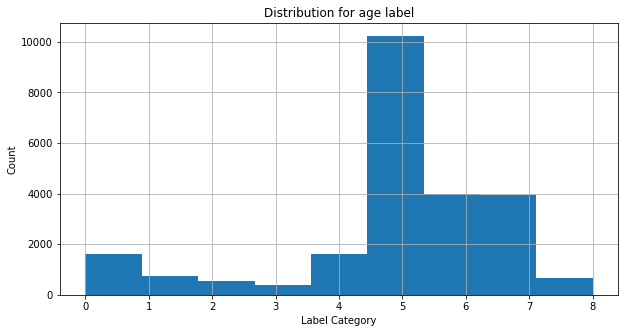

In [24]:
fig = plt.figure(figsize = (10, 5))
hist_age = df['age'].hist(bins=9)
plt.xlabel("Label Category")
plt.ylabel('Count')
plt.title("Distribution for age label")
plt.show()

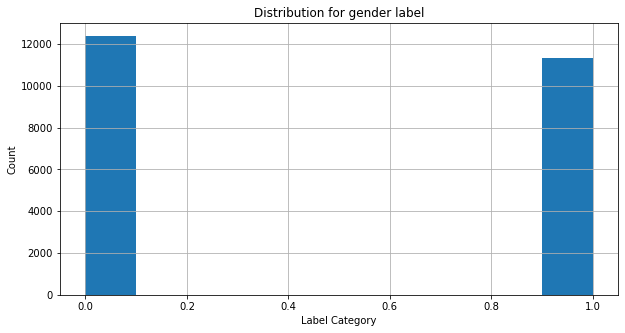

In [23]:
fig = plt.figure(figsize = (10, 5))
hist_age = df['gender'].hist()
plt.xlabel("Label Category")
plt.ylabel('Count')
plt.title("Distribution for gender label")
plt.show()

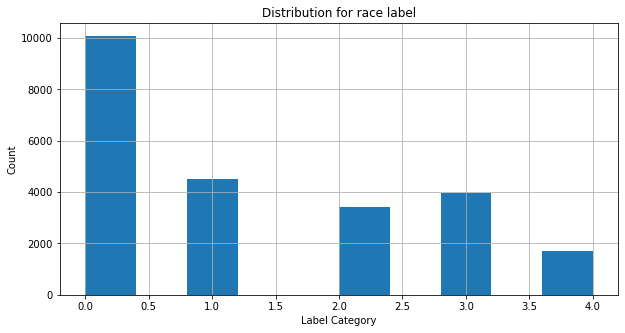

In [25]:
fig = plt.figure(figsize = (10, 5))
hist_age = df['race'].hist()
plt.xlabel("Label Category")
plt.ylabel('Count')
plt.title("Distribution for race label")
plt.show()